# Decision Tree Classification

Accuracy: 0.6333333333333333


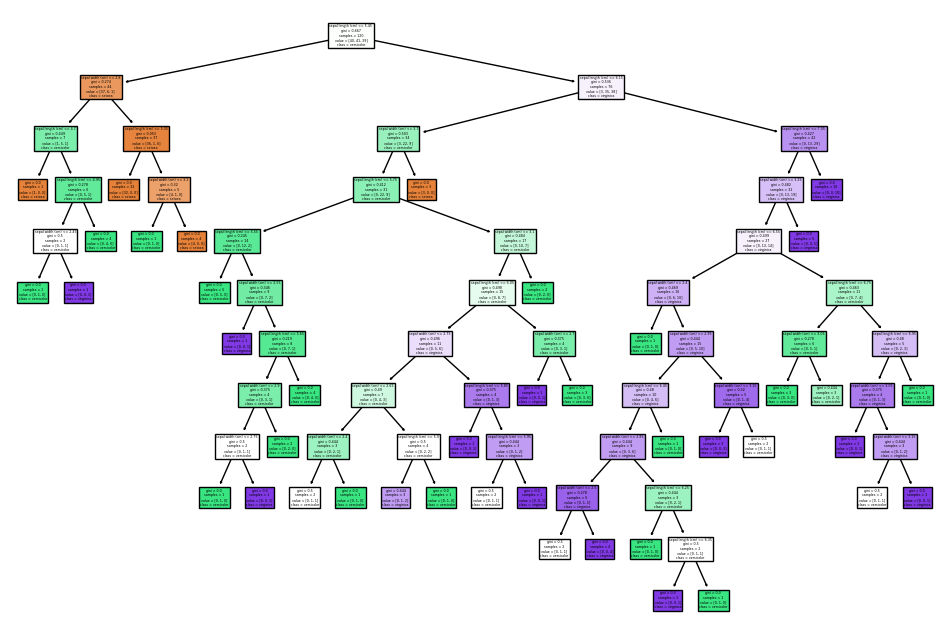

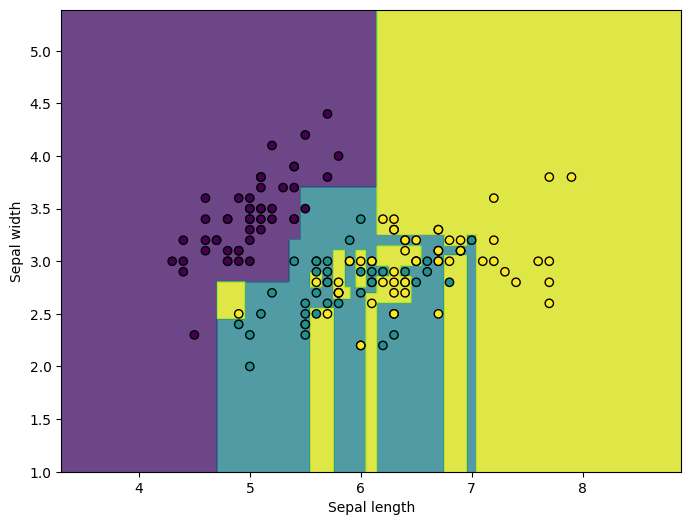

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Check accuracy
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


Accuracy: 0.8333333333333334


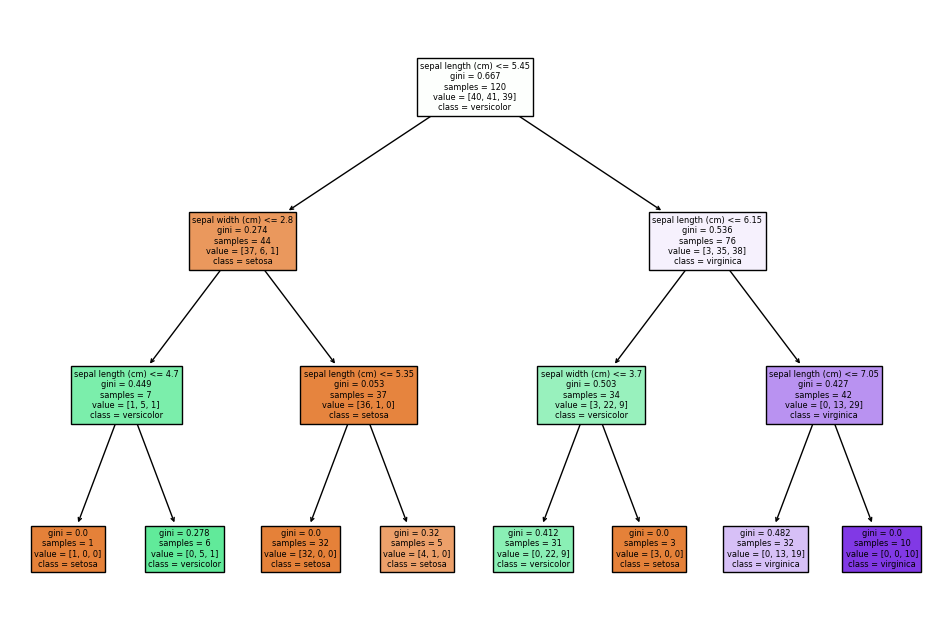

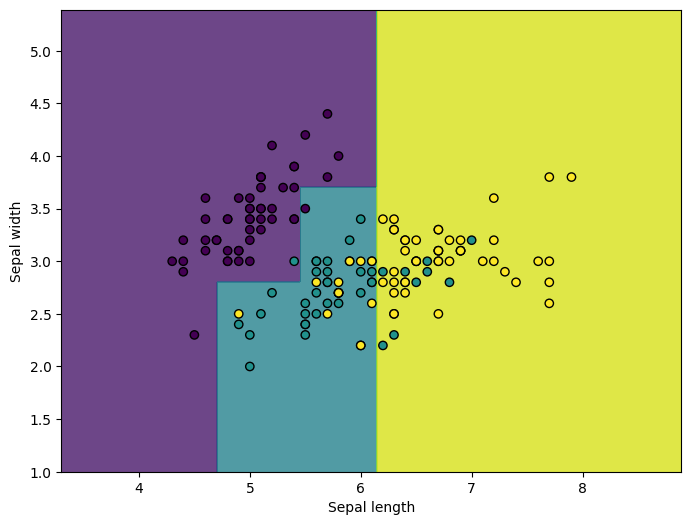

In [18]:

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Check accuracy
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


In [19]:
r = export_text(clf, feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- sepal_length <= 4.70
|   |   |   |--- class: 0
|   |   |--- sepal_length >  4.70
|   |   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- sepal_length <= 5.35
|   |   |   |--- class: 0
|   |   |--- sepal_length >  5.35
|   |   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- sepal_width <= 3.70
|   |   |   |--- class: 1
|   |   |--- sepal_width >  3.70
|   |   |   |--- class: 0
|   |--- sepal_length >  6.15
|   |   |--- sepal_length <= 7.05
|   |   |   |--- class: 2
|   |   |--- sepal_length >  7.05
|   |   |   |--- class: 2



In [20]:
clf.feature_importances_

array([0.76703203, 0.23296797])

# Decision Tree Regression

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_11464\1448895768.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


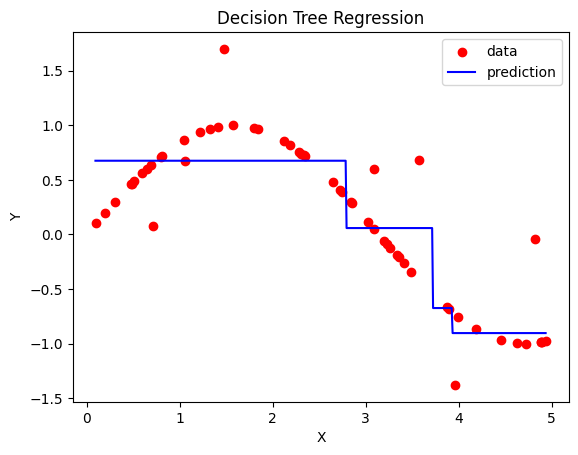

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

# Generate a non-linear dataset based on the sine function
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))  # add some noise to the data

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Decision Tree regressor
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

# To plot the regression curve, we'll sort the X values and predict Y values for the sorted X
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid = regressor.predict(X_grid)

# Plot the training data and the regression curve
plt.scatter(X_train, y_train, color='red', label='data')
plt.plot(X_grid, y_grid, color='blue', label='prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

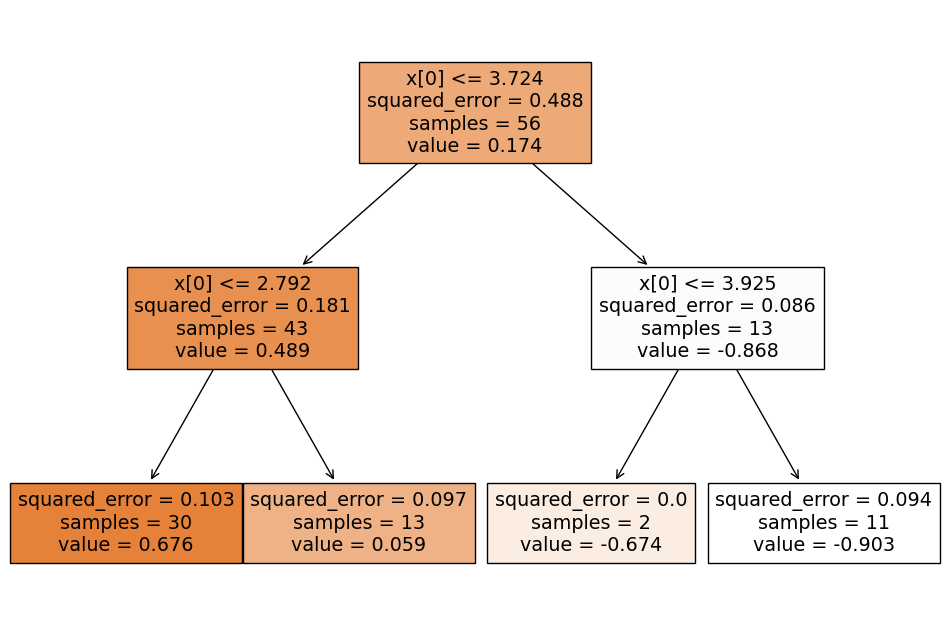

In [22]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True)
plt.show()

# Pruning

### Pruning is a technique used in machine learning to reduce the size of decision trees and to avoid overfitting. Overfitting happens when a model learns the training data too well, including its noise and outliers, which results in poor performance on unseen or test data.
### Decision trees are susceptible to overfitting because they can potentially create very complex trees that perfectly classify the training data but fail to generalize to new data. Pruning helps to solve this issue by reducing the complexity of the decision tree, thereby improving its predictive power on unseen data.
## There are two main types of pruning: pre-pruning and post-pruning.
-  Pre-pruning (Early stopping): This method halts the tree construction early. It can be done in various ways: by setting a limit on the maximum depth of the tree, setting a limit on the minimum number of instances that must be in a node to allow a split, or stopping when a split results in the improvement of the model’s accuracy below a certain threshold.
-  Post-pruning (Cost Complexity Pruning): This method allows the tree to grow to its full size, then prunes it. Nodes are removed from the tree based on the error complexity trade-off. The basic idea is to replace a whole subtree by a leaf node, and assign the most common class in that subtree to the leaf node.

# Pre-pruning

### Pre-pruning, also known as early stopping, is a technique where the decision tree is pruned during the learning process as soon as it's clear that further splits will not add significant value. There are several strategies for pre-pruning:
- `1. Maximum Depth:` One of the simplest forms of pre-pruning is to set a limit on the maximum depth of the tree. Once the tree reaches the specified depth during training, no new nodes are created. This strategy is simple to implement and can effectively prevent overfitting, but if the maximum depth is set too low, the tree might be overly simplified and underfit the data.
- `2. Minimum Samples Split:` This is a condition where a node will only be split if the number of samples in that node is above a certain threshold. If the number of samples is too small, then the node is not split and becomes a leaf node instead. This can prevent overfitting by not allowing the model to learn noise in the data.
- `3. Minimum Samples Leaf:` This condition requires that a split at a node must leave at least a minimum number of training examples in each of the leaf nodes. Like the minimum samples split, this strategy can prevent overfitting by not allowing the model to learn from noise in the data.
- `4. Maximum` Leaf Nodes: This strategy limits the total number of leaf nodes in the tree. The tree stops growing when the number of leaf nodes equals the maximum number.
- `5. Minimum Impurity Decrease:` This strategy allows a node to be split if the impurity decrease of the split is above a certain threshold. Impurity measures how mixed the classes within a node are. If the decrease is too small, the node becomes a leaf node.
- `6. Maximum Features:` This strategy considers only a subset of features for deciding a split at each node. The number of features to consider can be defined and this helps in reducing overfitting.

# Post Pruning

### Post-pruning, also known as backward pruning, is a technique used to prune the decision tree after it has been built. There are several strategies for post-pruning:

- `1. Cost Complexity Pruning (CCP):` Also known as Weakness Pruning, this
technique introduces a tuning parameter (α) that trades off between tree
complexity and its fit to the training data. For each value of α, there is an
optimal subtree that minimizes the cost complexity criterion. The subtree that
minimizes the cost complexity criterion over all values of α is chosen as the
pruned tree.
- `2. Reduced Error Pruning:` In this method, starting at the leaves, each node is
replaced with its most popular class. If the accuracy is not affected in the
validation set, the change is kept.